# Set up notebook

In [1]:
%load_ext rpy2.ipython

## r libraries

In [4]:
%%R
library(dplyr)
library(Seurat)
library(patchwork)
library(data.table)
library(DropletUtils)
library(scRNAseq)
library(scater)
library(scran)
library(PCAtools)
set.seed(110010101)



In [8]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.29.0
ipykernel        : 6.5.0
ipywidgets       : not installed
jupyter_client   : 7.0.6
jupyter_core     : 4.9.1
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.9
nbconvert        : 6.3.0
nbformat         : 5.1.3
notebook         : 6.4.6
qtconsole        : not installed
traitlets        : 5.1.1


In [7]:
%%R
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux

Matrix products: default
BLAS/LAPACK: /cluster/home/mtinti/miniconda3/envs/seurat2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] PCAtools_2.6.0              ggrepel_0.9.1              
 [3] scran_1.22.1                scater_1.22.0              
 [5] ggplot2_3.3.5               scuttle_1.4.0              
 [7] scRNAseq_2.8.0              DropletUtils_1.14.1        
 [9] SingleCellExperi

## python libraries

In [3]:
from platform import python_version
print(python_version())

3.9.7


In [3]:
#!conda env export > environment.yml

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns


In [13]:
%%R
sce_vex2_1 = readRDS('sce_vsg_vex2_1.rds')
sce_vex2_2 = readRDS('sce_vsg_vex2_2.rds')

sce_vex1_1 = readRDS('sce_vsg_vex1_1.rds')
sce_vex1_2 = readRDS('sce_vsg_vex1_2.rds')


sce_vsg<-cbind(sce_vex2_1, sce_vex2_2, sce_vex1_1, sce_vex1_2)
sce_vsg

class: SingleCellExperiment 
dim: 22 25572 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(25572): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGTTGCATGACTGT-1 TTTGTTGGTATCGAGG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [14]:
%%R
keep_feature <- colSums(counts(sce_vsg)) > 45
sce_vsg <- sce_vsg[, keep_feature]
sce_vsg

class: SingleCellExperiment 
dim: 22 8013 
metadata(0):
assays(1): counts
rownames(22): vsg-2-Tb427.BES40.22 vsg-9-Tb427.BES129.14 ...
  vsg-mes-Tb427VSG-559 vsg-mes-Tb427VSG-3591
rowData names(0):
colnames(8013): AAACCCAAGGTACATA-1 AAACCCAAGTTGTAAG-1 ...
  TTTGGTTAGGCTTAAA-1 TTTGTTGAGCCGATAG-1
colData names(19): discard_mito discard_sum ... subsets_Ribo_percent
  total
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


In [15]:
#2385+5628

In [16]:
%%R
#clust.sce <- quickCluster(sce_vsg)
sce_vsg <- computeSumFactors(sce_vsg)#, cluster=clust.sce, min.mean=0.1)
sce_vsg <- logNormCounts(sce_vsg)
assayNames(sce_vsg)

[1] "counts"    "logcounts"


In [118]:
%%R
test <- as.matrix(counts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_vex2_merge.csv",sep=''),sep = ",")



In [119]:
%%R
test <- as.matrix(logcounts(sce_vsg))
write.table(test,file=paste("new_count_vsg_vex1_vex2_merge_norm.csv",sep=''),sep = ",")



In [120]:
pd.read_csv('new_count_vsg_vex1_vex2_merge.csv',index_col=[0]).T.reset_index().shape

(8013, 23)

In [121]:
pd.read_csv('new_count_vsg_vex1_vex2_merge.csv',index_col=[0]).T.reset_index().head()

,index,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
0,AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,...,0,0,0,0,0,1,0,0,0,0
1,AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
3,AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [122]:
#%%R
#adjustcolor( "red", alpha.f = 0.2)

In [123]:
%%R
experiment_label = c(replicate(dim(sce_vex2_1)[2], 'VEX2' ), replicate(dim(sce_vex2_2)[2], 'VEX2' ),
                     
                     replicate(dim(sce_vex1_1)[2], 'VEX1'),  replicate(dim(sce_vex1_2)[2], 'VEX1'))
length(experiment_label)

[1] 25572


In [124]:
%%R
experiment_label = experiment_label[keep_feature]
length(experiment_label)

[1] 8013


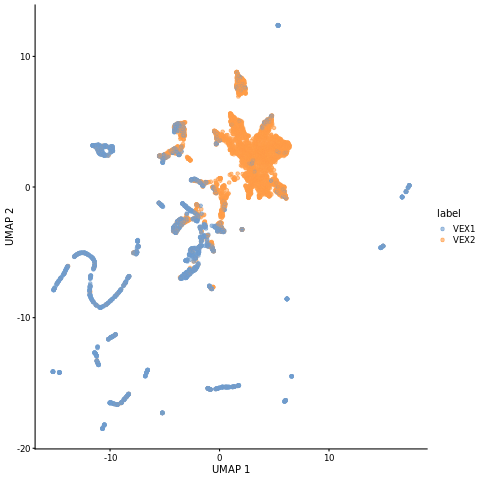

In [125]:
%%R
sce_vsg <- runUMAP(sce_vsg)
colLabels(sce_vsg) <- experiment_label
plotReducedDim(sce_vsg, dimred="UMAP", colour_by="label"
              ) + geom_point(
    shape=21, alpha = 0.2, size = 1, aes(color = factor(experiment_label)))

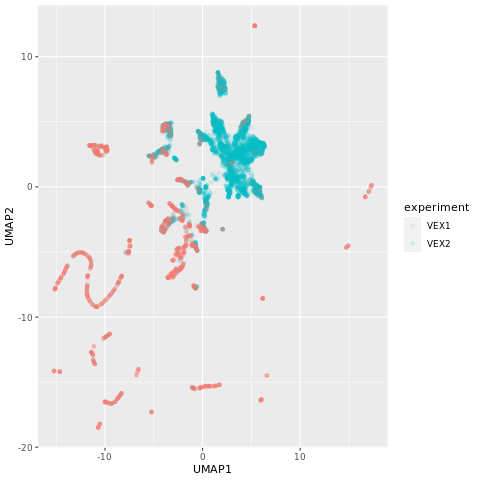

In [126]:
%%R
umap <- reducedDim(sce_vsg, "UMAP")
umap_df <- as.data.frame(umap)
colnames(umap_df) <- c("UMAP1", "UMAP2")
umap_df$experiment=experiment_label
head(umap_df)
ggplot(umap_df, aes(x = UMAP1, y = UMAP2, 
                     color=experiment))+ geom_point(
   
alpha = 1/10, 
)

In [127]:
%%R
library(bluster)
#clust.5 <- clusterCells(sce.pbmc, use.dimred="PCA", )


#nn.clusters <- clusterCells(sce_vsg, use.dimred="UMAP")
nn.clusters <- clusterCells(sce_vsg, assay.type='logcounts', BLUSPARAM=NNGraphParam(k=25))
table(nn.clusters)


nn.clusters
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 187   30   33  120   80   98   34   40   37   30   39   34   29   78   85   30 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
  24 1796   26  428  114   75   71   92   20   30   50   23   34   37  432  203 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  82   81   14   23  126   78   25   19  381  220  362   29  313   23   22   23 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  19   24   57   13   55   19   21  136  581  133   12   28   16   58   15   33 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78 
  12   46   20   49   14  124   78   15   13   52   13   13   72   12 


## Plot Cluster
- here an attempt to use log counts for clustering.
- the cluster are visualized using umap 


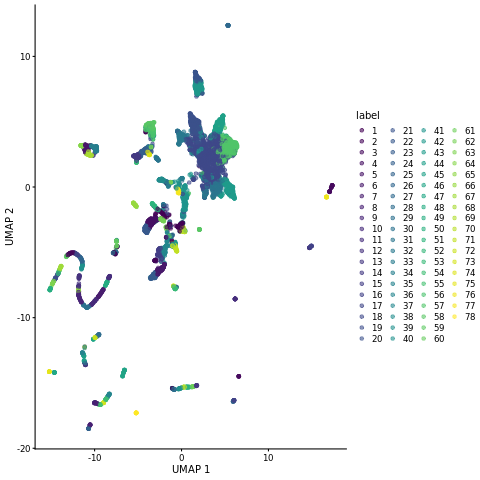

In [128]:
%%R
colLabels(sce_vsg) <- nn.clusters
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

## Plot z-score
here we compute and plot z scores for each vsgs

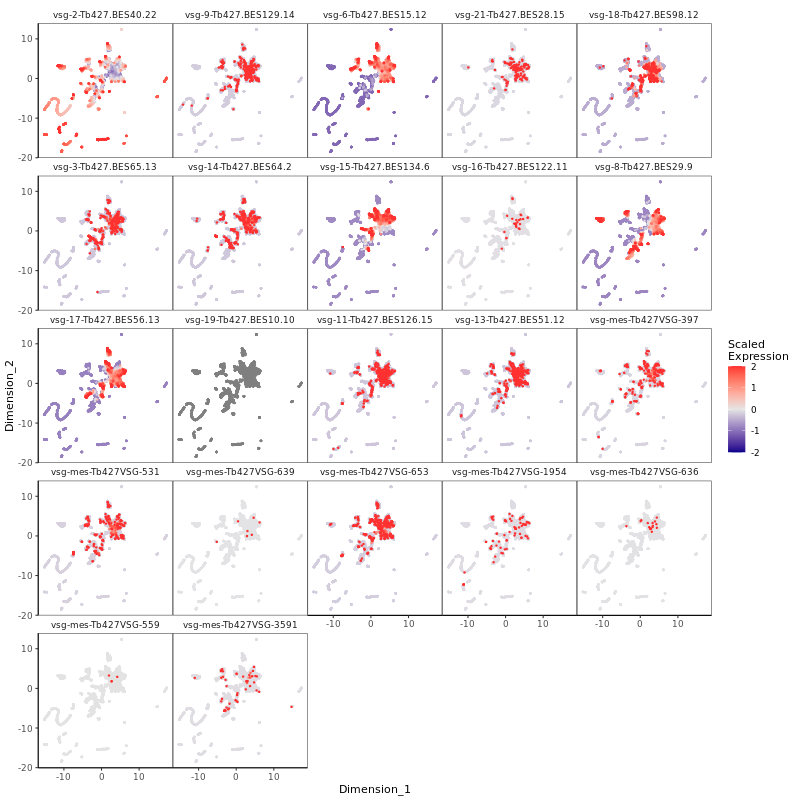

In [129]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE)

## Plot log counts
here we plot the log counts of the vsgs withput scaling

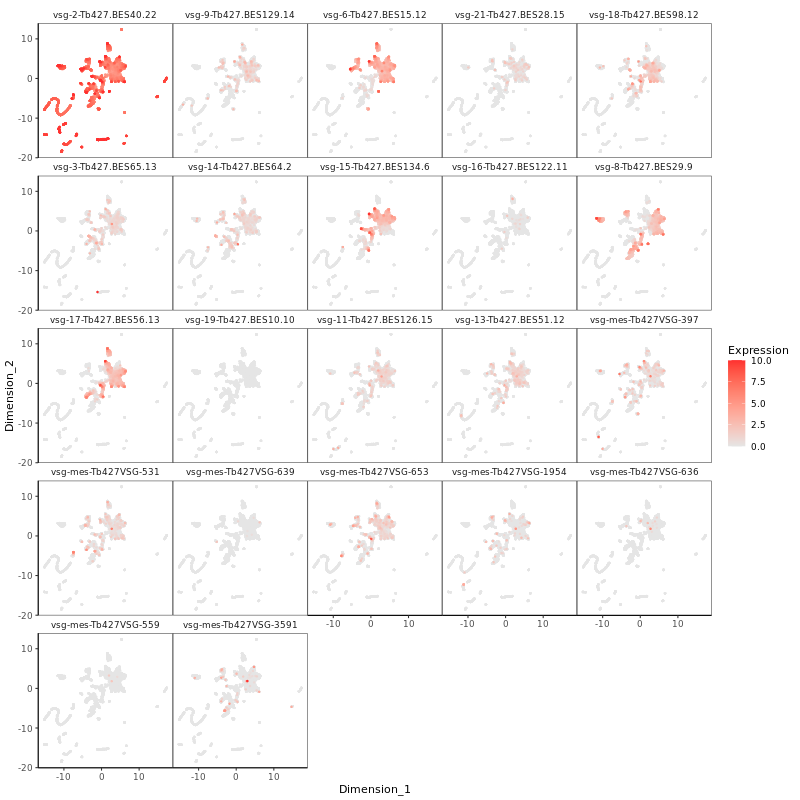

In [130]:
%%R -w 800 -h 800
library(celda)
umap <- reducedDim(sce_vsg, "UMAP")
plotDimReduceFeature(as.matrix(logcounts(sce_vsg)),
    dim1 = umap[, 1],
    dim2 = umap[, 2],
    features = rownames(sce_vsg),#c('vsg-2-Tb427.BES40.22', 'vsg-6-Tb427.BES15.12'),
    exactMatch = TRUE,
    zscore=FALSE,
    trim = c(0, 10),                 
    limits = c(0, 10),)

In [131]:
%%R
max(logcounts(sce_vsg))

[1] 19.93733


In [132]:
%%R
head(colLabels(sce_vsg))

[1] 41 18 18 20 18 42
78 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 78


In [133]:
%%R
rd<-reducedDim(sce_vsg, "UMAP")[,1:2]

In [134]:
%R -o rd
umap = pd.DataFrame(rd)
umap.columns = ['comp1','comp2']
umap.shape

(8013, 2)

In [135]:
%%R
lab<-colLabels(sce_vsg)
head(lab)

[1] 41 18 18 20 18 42
78 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 78


In [136]:
%R -o lab
umap = pd.concat([pd.read_csv('new_count_vsg_vex1_vex2_merge.csv').T.reset_index(),umap],axis=1)
umap=umap.set_index('index')
umap['clusters']=list(lab)
umap.to_csv('new_count_vsg_vex1_vex2_merge.csv')
umap.shape

(8013, 25)

In [137]:
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,1,0,0,0,0,0.162035,-0.300188,41
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,3.745979,2.133227,18
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0.839451,3.385553,18
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1.120159,4.746984,20
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,2.922259,0.686915,18


In [138]:
%R -o experiment_label
len(experiment_label)
#umap['exp']=list(experiment_label)

8013

In [139]:
umap['experiment_label']=list(experiment_label)
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,1,0,0,0,0,0.162035,-0.300188,41,VEX2
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,3.745979,2.133227,18,VEX2
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0.839451,3.385553,18,VEX2
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.120159,4.746984,20,VEX2
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,2.922259,0.686915,18,VEX2


In [140]:
umap['experiment_label'].value_counts()

VEX2    5628
VEX1    2385
Name: experiment_label, dtype: int64

In [141]:
umap.to_csv('new_count_vsg_vex1_vex2_merge.csv')

In [142]:
%%R
count_feature <- colSums(counts(sce_vsg)>0)


## Plot umap vsg size
The umap is color coded by the number ov vsgs expressed in each cell
The center yellow blob show the cell expressin all 5 vsgs

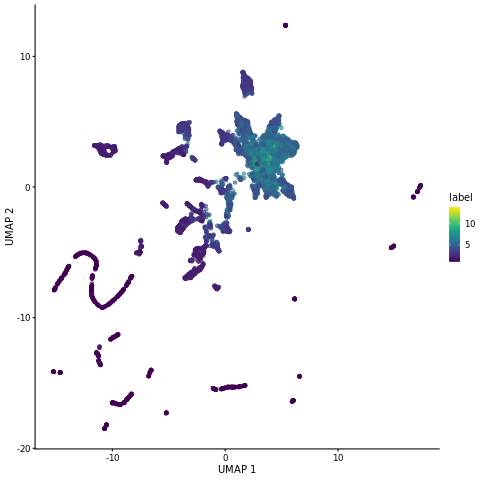

In [143]:
%%R
colLabels(sce_vsg) <- count_feature
plotReducedDim(sce_vsg, "UMAP", colour_by="label")

In [144]:
#%%R
#is.vsg6_8 <- is.vsg6 | is.vsg8 
#is.other <- is.vsg15 | is.vsg17 | is.vsg2
#is.vsg6_8 <- is.vsg6_8 & is.other 
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,1,0,0,0,0,0.162035,-0.300188,41,VEX2
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,3.745979,2.133227,18,VEX2
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0.839451,3.385553,18,VEX2
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.120159,4.746984,20,VEX2
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,2.922259,0.686915,18,VEX2


In [145]:
umap.sum().drop(['comp1','comp2','clusters','experiment_label']).sort_values()

vsg-19-Tb427.BES10.10          0
vsg-mes-Tb427VSG-639           8
vsg-mes-Tb427VSG-559          11
vsg-16-Tb427.BES122.11        36
vsg-mes-Tb427VSG-636          65
vsg-mes-Tb427VSG-1954        116
vsg-21-Tb427.BES28.15        197
vsg-mes-Tb427VSG-3591        265
vsg-mes-Tb427VSG-397         389
vsg-mes-Tb427VSG-531         397
vsg-mes-Tb427VSG-653         658
vsg-14-Tb427.BES64.2         809
vsg-9-Tb427.BES129.14        878
vsg-3-Tb427.BES65.13         992
vsg-11-Tb427.BES126.15      1027
vsg-13-Tb427.BES51.12       1190
vsg-18-Tb427.BES98.12       4122
vsg-8-Tb427.BES29.9        10537
vsg-15-Tb427.BES134.6      14399
vsg-17-Tb427.BES56.13      14512
vsg-6-Tb427.BES15.12       30191
vsg-2-Tb427.BES40.22      454111
dtype: object

#umap.sum().drop(['comp1','comp2','clusters']).sort_values()
vsg-mes-Tb427VSG-1954        193
vsg-21-Tb427.BES28.15        313
vsg-mes-Tb427VSG-531         529
vsg-mes-Tb427VSG-397         547
vsg-14-Tb427.BES64.2        1133
vsg-mes-Tb427VSG-653        1204
vsg-9-Tb427.BES129.14       1220
vsg-3-Tb427.BES65.13        1327
vsg-11-Tb427.BES126.15      1427
vsg-13-Tb427.BES51.12       1598
vsg-18-Tb427.BES98.12       5833
vsg-8-Tb427.BES29.9        13227
vsg-17-Tb427.BES56.13      21209
vsg-15-Tb427.BES134.6      22677
vsg-6-Tb427.BES15.12       44708
vsg-2-Tb427.BES40.22      463461

In [146]:
select = umap.drop(['comp1','comp2','clusters','experiment_label'],axis=1)
select.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-11-Tb427.BES126.15,vsg-13-Tb427.BES51.12,vsg-mes-Tb427VSG-397,vsg-mes-Tb427VSG-531,vsg-mes-Tb427VSG-639,vsg-mes-Tb427VSG-653,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0,1,0,0,0,0
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,0,0,0,0,0,0
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0


In [147]:
vsg_class = []
for n in range(select.shape[0]):
    temp = select.iloc[n]
    temp = temp[temp>0]
    temp = list(temp.index)
    temp.sort()
    #print(temp)
    temp = [b for b in temp if b not in ['comp1','comp2']]
    temp.sort()
    temp=tuple(temp)
    vsg_class.append(temp)
    
    

umap['vsg_class'] = vsg_class
umap['size_class'] = [len(n) for n in  umap['vsg_class']]
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0.162035,-0.300188,41,VEX2,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,3.745979,2.133227,18,VEX2,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0.839451,3.385553,18,VEX2,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,1.120159,4.746984,20,VEX2,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,2.922259,0.686915,18,VEX2,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5


In [148]:
umap.vsg_class.value_counts().head(10)

(vsg-2-Tb427.BES40.22,)                                                                                                                   983
(vsg-2-Tb427.BES40.22, vsg-8-Tb427.BES29.9)                                                                                               506
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)                           390
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                287
(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13, vsg-18-Tb427.BES98.12, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12, vsg-8-Tb427.BES29.9)    239
(vsg-17-Tb427.BES56.13, vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                       234
(vsg-2-Tb427.BES40.22, vsg-6-Tb427.BES15.12)                                                                                              222
(vsg-1

In [149]:
umap.size_class.value_counts()

4     1397
5     1395
3     1244
2     1206
6     1017
1      983
7      519
8      167
9       62
10      18
11       4
14       1
Name: size_class, dtype: int64

In [150]:
umap.shape

(8013, 28)

In [38]:
#%R -o experiment_label

In [151]:
#umap['replica']=experiment_label
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0.162035,-0.300188,41,VEX2,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,3.745979,2.133227,18,VEX2,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0.839451,3.385553,18,VEX2,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,1.120159,4.746984,20,VEX2,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,2.922259,0.686915,18,VEX2,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5


In [152]:
umap.to_csv("new_count_vsg_vex1_vex2_merge.csv")
umap.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0.162035,-0.300188,41,VEX2,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,3.745979,2.133227,18,VEX2,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0.839451,3.385553,18,VEX2,"(vsg-14-Tb427.BES64.2, vsg-15-Tb427.BES134.6, ...",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,1.120159,4.746984,20,VEX2,"(vsg-15-Tb427.BES134.6, vsg-17-Tb427.BES56.13,...",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,2.922259,0.686915,18,VEX2,"(vsg-13-Tb427.BES51.12, vsg-17-Tb427.BES56.13,...",5


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('new_count_vsg_vex1_vex2_merge.csv',index_col =[0])

In [154]:
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-1954,vsg-mes-Tb427VSG-636,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label,vsg_class,size_class
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0,0,0.162035,-0.300188,41,VEX2,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",8
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,0,0,3.745979,2.133227,18,VEX2,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",7
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0,0,0.839451,3.385553,18,VEX2,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",4
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,0,0,1.120159,4.746984,20,VEX2,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",4
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,0,0,2.922259,0.686915,18,VEX2,"('vsg-13-Tb427.BES51.12', 'vsg-17-Tb427.BES56....",5


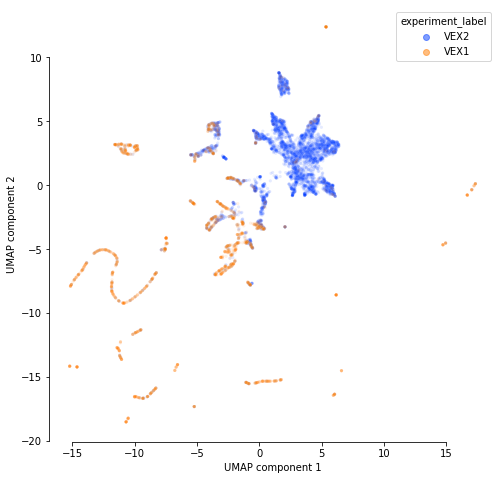

In [155]:

fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='experiment_label', ax=ax,
                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
leg.set_title('experiment_label')

ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

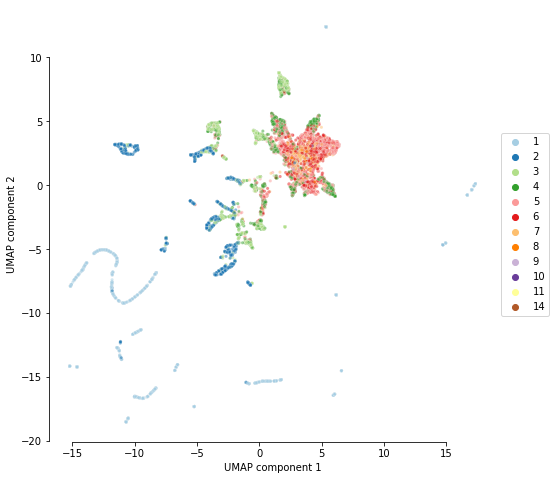

In [157]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='comp1',y='comp2', hue='size_class', ax=ax,
                alpha=0.5, s=10,palette ='Paired')
ax.legend(title='Size Class')
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(fig,trim=True)

In [158]:
def clean_vsgs(X):
    res = []
    for n in eval(X):

        if 'mes' in n:
            temp_id = 'mes-'+n.split('-')[-1]
        else:
            temp_id = 'vsg-'+n.split('-')[1]
        res.append(temp_id)
    return ';'.join(res)

In [159]:
df['vsg_class2'] = df['vsg_class'].apply(clean_vsgs)

In [160]:
vsg_selections = df['vsg_class2'].value_counts().head(9).index.values


In [161]:
df['vsg_class3'] = [n if n in vsg_selections else 'other' for n in df['vsg_class2']]
df.head()
                    

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,vsg-mes-Tb427VSG-559,vsg-mes-Tb427VSG-3591,comp1,comp2,clusters,experiment_label,vsg_class,size_class,vsg_class2,vsg_class3
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0,0,0.162035,-0.300188,41,VEX2,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",8,vsg-14;vsg-15;vsg-17;vsg-2;vsg-6;vsg-8;vsg-9;m...,other
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,0,0,3.745979,2.133227,18,VEX2,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",7,vsg-15;vsg-17;vsg-18;vsg-2;vsg-3;vsg-6;vsg-8,other
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0,0,0.839451,3.385553,18,VEX2,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",4,vsg-14;vsg-15;vsg-2;vsg-6,other
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,0,0,1.120159,4.746984,20,VEX2,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",4,vsg-15;vsg-17;vsg-2;vsg-6,vsg-15;vsg-17;vsg-2;vsg-6
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,0,0,2.922259,0.686915,18,VEX2,"('vsg-13-Tb427.BES51.12', 'vsg-17-Tb427.BES56....",5,vsg-13;vsg-17;vsg-18;vsg-2;vsg-6,other


In [162]:
#import seaborn as sns
#fig,ax=plt.subplots(figsize=(8,8))
#sns.scatterplot(data=df, x='comp1',y='comp2', hue='vsg_class3', ax=ax,
#                alpha=0.1, s=10,palette ='bright')

#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
#ax.set_xlabel('UMAP component 1')   
#ax.set_ylabel('UMAP component 2')

#sns.despine(fig,trim=True)

In [163]:
dict_size = df['vsg_class3'].value_counts().to_dict()
df['vsg_class4'] = [n+' (n='+str(dict_size[n])+')' for n in df['vsg_class3']]
df['vsg_count_5'] = [dict_size[n] for n in df['vsg_class3']]


In [164]:
palette = sns.color_palette('bright')
use_palette = list(palette)
use_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [165]:
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [166]:
light_blue = use_palette[-1]#= (0.5, 0.5, 0.5)
grey = use_palette[-3]
use_palette[-3]=light_blue
use_palette[-1]=grey
use_palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.0, 0.8431372549019608, 1.0),
 (1.0, 0.7686274509803922, 0.0),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098)]

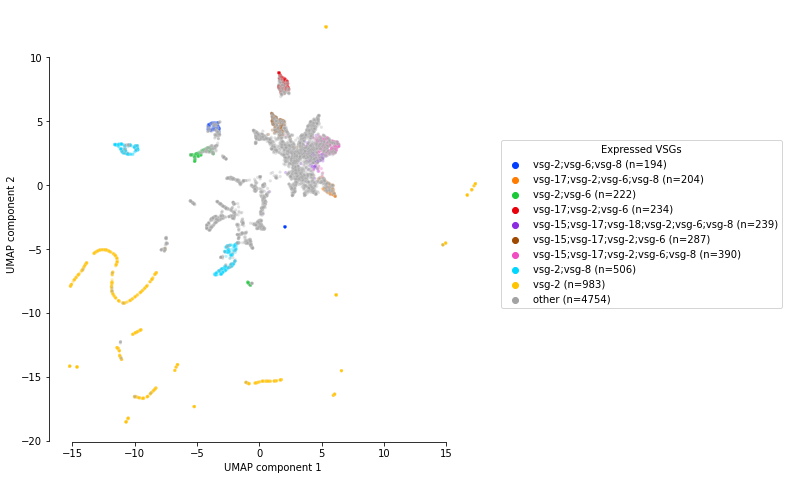

In [167]:

import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df.sort_values('vsg_count_5'), x='comp1',y='comp2', hue='vsg_class4', ax=ax,
                alpha=0.3, s=10, palette =use_palette)

#sns.scatterplot(data=df[df['vsg_class3']=='other'].sort_values('vsg_count_5'), x='comp1',y='comp2',  ax=ax,
#                alpha=0.1, s=10, c='b')


#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

In [168]:
df.sort_values('vsg_count_5')['vsg_count_5'].unique()


array([ 194,  204,  222,  234,  239,  287,  390,  506,  983, 4754])

In [169]:
df.head()

,vsg-2-Tb427.BES40.22,vsg-9-Tb427.BES129.14,vsg-6-Tb427.BES15.12,vsg-21-Tb427.BES28.15,vsg-18-Tb427.BES98.12,vsg-3-Tb427.BES65.13,vsg-14-Tb427.BES64.2,vsg-15-Tb427.BES134.6,vsg-16-Tb427.BES122.11,vsg-8-Tb427.BES29.9,...,comp1,comp2,clusters,experiment_label,vsg_class,size_class,vsg_class2,vsg_class3,vsg_class4,vsg_count_5
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGTACATA-1,69,1,1,0,0,0,1,5,0,1,...,0.162035,-0.300188,41,VEX2,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",8,vsg-14;vsg-15;vsg-17;vsg-2;vsg-6;vsg-8;vsg-9;m...,other,other (n=4754),4754
AAACCCAAGTTGTAAG-1,39,0,8,0,2,1,0,4,0,3,...,3.745979,2.133227,18,VEX2,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",7,vsg-15;vsg-17;vsg-18;vsg-2;vsg-3;vsg-6;vsg-8,other,other (n=4754),4754
AAACCCACACCTTCCA-1,37,0,4,0,0,0,1,4,0,0,...,0.839451,3.385553,18,VEX2,"('vsg-14-Tb427.BES64.2', 'vsg-15-Tb427.BES134....",4,vsg-14;vsg-15;vsg-2;vsg-6,other,other (n=4754),4754
AAACCCACAGTTTCAG-1,59,0,5,0,0,0,0,1,0,0,...,1.120159,4.746984,20,VEX2,"('vsg-15-Tb427.BES134.6', 'vsg-17-Tb427.BES56....",4,vsg-15;vsg-17;vsg-2;vsg-6,vsg-15;vsg-17;vsg-2;vsg-6,vsg-15;vsg-17;vsg-2;vsg-6 (n=287),287
AAACCCACATGAATAG-1,36,0,3,0,3,0,0,0,0,0,...,2.922259,0.686915,18,VEX2,"('vsg-13-Tb427.BES51.12', 'vsg-17-Tb427.BES56....",5,vsg-13;vsg-17;vsg-18;vsg-2;vsg-6,other,other (n=4754),4754


In [170]:
df['size_class_2'] = [n if n in [1,2,5] else 'other' for n in df['size_class']]

In [174]:
use_palette2 = [use_palette[-1]]+use_palette[0:3]

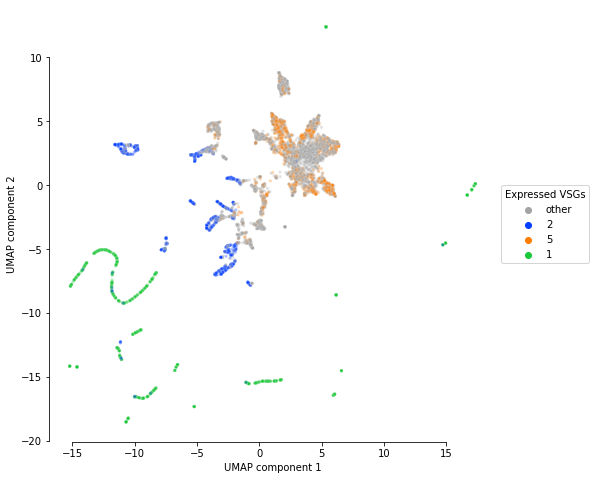

In [175]:

import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df.sort_values('vsg_count_5'), x='comp1',y='comp2', hue='size_class_2', ax=ax,
                alpha=0.3, s=10, palette =use_palette2)

#sns.scatterplot(data=df[df['vsg_class3']=='other'].sort_values('vsg_count_5'), x='comp1',y='comp2',  ax=ax,
#                alpha=0.1, s=10, c='b')


#ax.legend(title='Size Class')
#leg = plt.legend()
#for lh in leg.legendHandles: 
#   lh.set_alpha(0.5)
#leg.set_title('Replica')
#leg.loc='center left'
#leg.bbox_to_anchor=(1, 0.5)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Expressed VSGs' )
ax.set_xlabel('UMAP component 1')   
ax.set_ylabel('UMAP component 2')

sns.despine(fig,trim=True)

In [176]:
df.to_csv('final_df.csv')